In [16]:
## Audio classification using machine learning
## Note:- To use librosa.wave show function you need to downgrade your matplotlib version to 3.7 otherwise it will give error 

In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
from   tqdm import tqdm
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

2024-03-21 11:50:17.233891: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
filename='7965-3-22-0.wav'

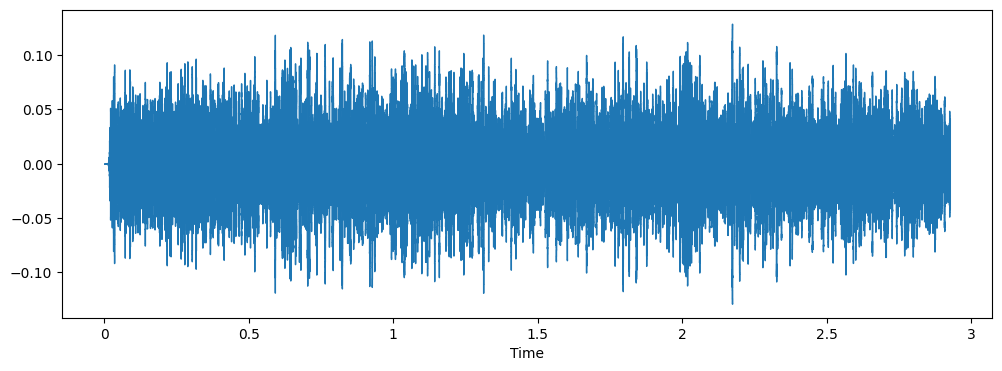

In [3]:
plt.figure(figsize=(12,4))
data,samplerate=librosa.load(filename)
librosa.display.waveshow(data,sr=samplerate)
ipd.Audio(filename)

In [4]:
data

array([-9.3132257e-10,  4.6566129e-09, -1.8626451e-09, ...,
       -2.8177232e-02, -3.9498169e-02, -1.3490321e-02], dtype=float32)

In [5]:
from scipy.io import wavfile as wav

In [6]:
wave_sample_rate,wave_audio=wav.read(filename)

In [7]:
wave_sample_rate

44100

In [8]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-1384,  -278],
       [-1089, -2036],
       [ -937,   259]], dtype=int16)

In [9]:
data

array([-9.3132257e-10,  4.6566129e-09, -1.8626451e-09, ...,
       -2.8177232e-02, -3.9498169e-02, -1.3490321e-02], dtype=float32)

In [10]:
## in librosa audio gets normalised but in scipy it doesnot happen like that and librosa give standard sample rate to all the files but in
# scipy it does not do that
## it is reason we are using librosa

In [11]:
import pandas as pd


In [12]:
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [13]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
## check whether data is balance or imbalance
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [15]:
## By default librosa converst the audio in one single channel that is stereo. one dimensional data.
## Scipy converts audio in two dimensional.


Extact Feautres:-

for extacting features from a audio file there are various different technique one of the technique is Mel-Frequency Cepstral Coefficients(MFCC) basically this technique will convert audio into some kind of features based on frequency and time characterstics which 
will help in classification of audio.

In [16]:
mfccs=librosa.feature.mfcc(y=data,sr=samplerate,n_mfcc=30)

In [17]:
## to apply Feature extaction method on whole dataset
audio_dataset='UrbanSound8K/audio'
meta_data=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [18]:
def feature_extract(filename):
    audio_data,samplerate=librosa.load(filename)
    mfccs_features=librosa.feature.mfcc(y=audio_data,sr=samplerate,n_mfcc=30)
    mfccs_scaled_feature=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_feature

In [20]:
extracted_feature=[]
for index_num,row in tqdm(meta_data.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_label=row["class"]
    data=feature_extract(file_name)
    extracted_feature.append([data,final_class_label])

3555it [01:55, 28.46it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [05:27, 35.02it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:39, 25.72it/s]


In [21]:
extracted_feature

[[array([-2.1193698e+02,  6.2581207e+01, -1.2281315e+02, -6.0745281e+01,
         -1.3893759e+01, -2.9789829e+01, -3.9788716e+00,  1.1682744e+01,
          1.2963831e+01,  8.3364248e+00, -6.5298162e+00, -2.9961026e+00,
         -1.2887947e+01,  5.8859344e+00, -2.4752228e+00, -4.4083090e+00,
         -1.5014473e+01, -9.4399518e-01, -2.5799065e+00,  6.0982995e+00,
         -1.0786225e+01, -8.0634747e+00,  5.8440924e+00, -3.1225333e+00,
         -5.9842248e+00, -7.9941645e-02, -3.6870859e+00,  4.7476797e+00,
         -6.5300913e+00, -5.0838804e+00], dtype=float32),
  'dog_bark'],
 [array([-4.1700519e+02,  9.9336617e+01, -4.2995586e+01,  5.1073326e+01,
          9.8537779e+00,  7.9696927e+00,  1.1197089e+01,  1.9291172e+00,
          7.0303984e+00,  4.2702274e+00, -3.5847254e+00,  1.3890946e+01,
         -2.7644935e+00,  7.2725554e+00,  5.5344191e+00,  1.8692904e+00,
          1.7257473e+00,  7.0386682e+00, -2.4422672e+00,  3.4736145e+00,
          7.4228674e-02,  6.2188630e+00, -1.8934049

In [22]:
extracted_feature_df=pd.DataFrame(extracted_feature,columns=['Feature','class'])

In [23]:
extracted_feature_df

,Feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.74528,...",dog_bark
1,"[-417.0052, 99.33662, -42.995586, 51.073326, 9...",children_playing
2,"[-452.39316, 112.36253, -37.57807, 43.195866, ...",children_playing
3,"[-406.47922, 91.1966, -25.043562, 42.78452, 11...",children_playing
4,"[-439.63867, 103.86224, -42.658787, 50.690285,...",children_playing
...,...,...
8727,"[-391.3721, 125.36239, -40.634056, 25.899754, ...",car_horn
8728,"[-339.42715, 76.409096, -35.30988, 41.984035, ...",car_horn
8729,"[-297.31534, 102.09026, -36.75108, 26.816488, ...",car_horn
8730,"[-336.92386, 115.3139, -44.8471, 24.968985, -9...",car_horn


In [24]:
X=np.array(extracted_feature_df['Feature'].tolist())
Y=np.array(extracted_feature_df['class'].tolist())

In [25]:
##label encoding
y=np.array(pd.get_dummies(Y))

In [26]:
y.shape

(8732, 10)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

In [28]:
## model creation
import tensorflow as tf
print(tf.__version__)

2.16.1


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [30]:
# no.of classes
num_labels=y.shape[1]

In [100]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(30,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [101]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,410 (173.48 KB)

 Trainable params: 44,410 (173.48 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [104]:
## Trianing my model
num_epochs = 100
num_batch_size = 100

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
67/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 1.0637
Epoch 1: val_loss improved from inf to 0.86210, saving model to saved_models/audio_classification.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6526 - loss: 1.0626 - val_accuracy: 0.7172 - val_loss: 0.8621
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6496 - loss: 1.0453
Epoch 2: val_loss did not improve from 0.86210
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6496 - loss: 1.0452 - val_accuracy: 0.7052 - val_loss: 0.8728
Epoch 3/100
57/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6504 - loss: 1.0395
Epoch 3: val_loss did not improve from 0.86210
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 1.0403 - val_accuracy: 0.7189 - val_loss: 0.8632
Epoch 4/100
68/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6495 - loss: 1.0382
Epoch 4: val_loss improved from 0.86210 to 0.84609, saving model to saved_models/audio_classification.keras
70/70 ━━━

In [105]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7664567828178406


In [118]:
list_class=['Air_Conditioner','Car_Horn','Children_Playing','Dog_Bark','Drilling','Engine_Idling','Gun_Shot','Jackhammer','Siren','Street_Music']

In [126]:
## Testing of model
filename='typical-trap-loop-2b-130751.mp3'
prediction_feature=feature_extract(filename)
prediction_feature=prediction_feature.reshape(1,-1)
class_id=np.argmax(model.predict(prediction_feature))
print("Audio which you have given input is of",list_class[class_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Audio which you have given input is of Gun_Shot
